In [25]:
import speech_recognition as sr
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

from gtts import gTTS
import pygame
import webbrowser

In [3]:
# ! pip install pyaudio

  Using cached PyAudio-0.2.13-cp311-cp311-win_amd64.whl (164 kB)



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
for index, name in enumerate(sr.Microphone().list_microphone_names()):
    print("Microphone with name \"{1}\" found for `Microphone(device_index={0})`".format(index, name))

Microphone with name "Microsoft Sound Mapper - Input" found for `Microphone(device_index=0)`
Microphone with name "Microphone Array (Realtek(R) Au" found for `Microphone(device_index=1)`
Microphone with name "Microphone (DroidCam Virtual Au" found for `Microphone(device_index=2)`
Microphone with name "Headset (OnePlus Bullets Wirele" found for `Microphone(device_index=3)`
Microphone with name "Line 1 (Virtual Audio Cable)" found for `Microphone(device_index=4)`
Microphone with name "Microsoft Sound Mapper - Output" found for `Microphone(device_index=5)`
Microphone with name "Headphones (OnePlus Bullets Wir" found for `Microphone(device_index=6)`
Microphone with name "Line 1 (Virtual Audio Cable)" found for `Microphone(device_index=7)`
Microphone with name "Speakers (Realtek(R) Audio)" found for `Microphone(device_index=8)`
Microphone with name "Primary Sound Capture Driver" found for `Microphone(device_index=9)`
Microphone with name "Microphone Array (Realtek(R) Audio)" found for `Micr

In [5]:
def listen_to_user():
    r = sr.Recognizer()
    with sr.Microphone(device_index=3) as source:
        print("listening...")
        audio = r.listen(source)
        
        try:
            text = r.recognize_google(audio)
            return text
        except sr.UnknownValueError:
            print("Muje samaj nahi aaya")
            return None
            

In [6]:
listen_to_user()

listening...


'can you hear me'

In [9]:
# download efficient net
efficientnet = tf.keras.applications.EfficientNetB3(weights='imagenet')

In [13]:
def describe_image():
    cap = cv2.VideoCapture(2)
    flag,img = cap.read()
    img = img[:,:,::-1]
    plt.imshow(img)
    
    img_array = cv2.resize(img, (300,300))
    img_array = tf.expand_dims(img_array, axis = 0)
    img_array = tf.keras.applications.efficientnet.preprocess_input(img_array)
    
    prediciton = efficientnet.predict(img_array)
    decoded_pred = tf.keras.applications.efficientnet.decode_predictions(prediciton, top = 1)[0][0][1]  
    
    return f'I think the image contains {decoded_pred}'  

1/1 [==============================] - 5s 5s/step


'I think the image contains parachute'

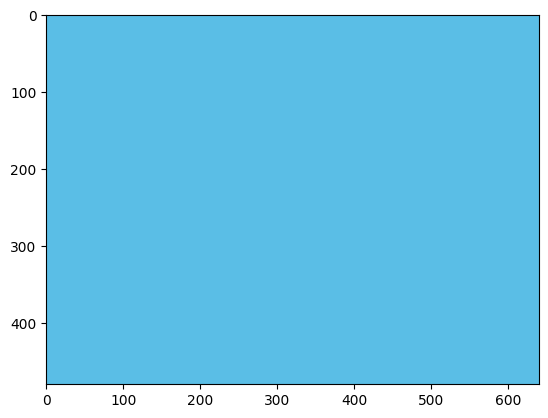

In [14]:
describe_image()

In [18]:
def no_gen():
    num = 1
    while True:
        yield num
        num += 1
        
gen = no_gen()

In [22]:
def speak(text):
    tts = gTTS(text= text, lang= 'en')
    resp_no = next(gen)
    audio_file = f'response{resp_no}.mp3'
    tts.save(audio_file)
    
    pygame.mixer.init()
    pygame.mixer.music.load(audio_file)
    pygame.mixer.music.play()
    while pygame.mixer.music.get_busy():
        continue

In [29]:
speak("how are you")

In [26]:
def main():
    user_input = listen_to_user()
    
    if user_input:
        if 'describe the image' in user_input.lower():
            response = describe_image()
        elif 'play my song' in user_input.lower():
            webbrowser.open('https://www.youtube.com/')
            response = "playing your song"
        
        print('Assistant Resp : ',response)
        speak(response)
        

In [27]:
main()

listening...
Assistant Resp :  playing your song
